# <h1>Introduction</h1>

<h3>Aim of Project</h3>
Extracting essential data by webscraping internet sites and using survey data. Once data collection is complete, make data ready for analysis using data wrangling techniques, then apply statistical techniques to analyze the data. 

After analysis bring all of your information together by using  IBM Cognos Analytics to create your dashboard showing top and emerging programming skills.

<h3>Import Libraries</h3>

In [1]:
!pip install html5lib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 19.7 MB/s eta 0:00:00


In [2]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [3]:
#This url contain data for languages and annual salary
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

Download the webpage at the url

In [4]:
data = requests.get(url).text

Create a Soup Object

In [5]:
soup = BeautifulSoup(data, 'html5lib')

In [ ]:
scrape=pd.DataFrame(columns=["Language_name", "Annual_average_salary"])
for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    language = col[1].text
    salary = col[3].text
   
    scrape = scrape.append({"Language_name":language, "Annual_average_salary":salary}, ignore_index=True)

Save scraped data as csv file

In [ ]:
scrape.to_csv('popular-languages.csv')

In [8]:
scrape.head()

,Language_name,Annual_average_salary
0,Language,Average Annual Salary
1,Python,"$114,383"
2,Java,"$101,013"
3,R,"$92,037"
4,Javascript,"$110,981"


Load Survey Data

In [9]:
#this data set contain survey data which would be used extensively in out analysis
survey_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m1_survey_data.csv"

Load data into a dataframe 

In [10]:
Survey_data=pd.read_csv(survey_url)

Explore Data

In [11]:
#Display top 5 rows
Survey_data.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy


In [11]:
#Find out number of rows and columns
print('Number of rows:', len(Survey_data.index))
print('Number of columns:',len(Survey_data.columns))

Number of rows: 11552
Number of columns: 85


In [15]:
#Data type of all columns
Survey_data.dtypes

Respondent       int64
MainBranch      object
Hobbyist        object
OpenSourcer     object
OpenSource      object
                 ...  
Sexuality       object
Ethnicity       object
Dependents      object
SurveyLength    object
SurveyEase      object
Length: 85, dtype: object

In [17]:
#How many Countries are they in the dataset
Survey_data['Country'].unique()

array(['United States', 'New Zealand', 'United Kingdom', 'Australia',
       'Brazil', 'Lithuania', 'Israel', 'South Africa', 'Czech Republic',
       'Spain', 'Germany', 'Serbia', 'India', 'Sweden', 'China', 'France',
       'Netherlands', 'Philippines', 'Ireland', 'Pakistan', 'Austria',
       'Canada', 'Croatia', 'Italy', 'Russian Federation', 'Argentina',
       'Romania', 'Iran', 'Hungary', 'Latvia', 'Hong Kong (S.A.R.)',
       'United Arab Emirates', 'Poland', 'Portugal', 'Bulgaria',
       'Nicaragua', 'Denmark', 'Japan', 'Guatemala', 'Bangladesh',
       'Ukraine', 'Mexico', 'Egypt', 'Switzerland', 'Mauritius',
       'South Korea', 'Slovenia', 'Estonia', 'Norway', 'Singapore',
       'Republic of Moldova', 'Belgium', 'Nigeria', 'Turkey', 'Thailand',
       'Mongolia', 'Chile', 'Malaysia', 'Georgia', 'Luxembourg',
       'Dominican Republic', 'Cape Verde', 'Burundi', 'Finland', 'Greece',
       'Colombia', 'Taiwan', 'Yemen', 'Indonesia', 'Belarus', 'Slovakia',
       'Nepal', 

<h3>Data Wrangling</h3>

In [21]:
#Find duplicate rows
duplicated = Survey_data.duplicated()
duplicated.sum()

154

In [72]:
#Drop duplicates
Survey_data2 = Survey_data.drop_duplicates()

In [28]:
#Confirm if duplicates have bee dropped
Survey_data2.duplicated().sum()

0

In [25]:
#Find missing data
Survey_data2.isnull().sum()

Respondent        0
MainBranch        0
Hobbyist          0
OpenSourcer       0
OpenSource       81
               ... 
Sexuality       542
Ethnicity       675
Dependents      140
SurveyLength     19
SurveyEase       14
Length: 85, dtype: int64

We will be replacing missing values by most frequent value for cuolumns to be used for the analysis

In [27]:
#Find value count for the column WorkLoc
Survey_data2['WorkLoc'].value_counts()

Office                                            6806
Home                                              3589
Other place, such as a coworking space or cafe     971
Name: WorkLoc, dtype: int64

In [28]:
#Find most frequent in WorkLoc column
Survey_data2['WorkLoc'].mode()

0    Office
Name: WorkLoc, dtype: object

In [ ]:
#Impute(replace) all the empty rows in the column WorkLoc with the value identified as majority.
Survey_data2['WorkLoc'].fillna('Office', inplace=True)

In [40]:
#Verify the input
Survey_data2['WorkLoc'].isnull().sum()

0

There are two columns in the dataset that talk about compensation. One is "CompFreq". This column shows how often a developer is paid (Yearly, Monthly, Weekly), the other is "CompTotal". This column talks about how much the developer is paid per Year, Month, or Week depending upon his/her "CompFreq". This makes it difficult to compare the total compensation of the developers.
Create a new column called 'NormalizedAnnualCompensation' which contains the 'Annual Compensation' irrespective of the 'CompFreq'. Once this column is ready, it makes comparison of salaries easy.

In [43]:

conditions = [
    (Survey_data2['CompFreq'] == 'Weekly'),
    (Survey_data2['CompFreq'] == 'Monthly'),
    (Survey_data2['CompFreq'] == 'Yearly')]
values = [(Survey_data2['CompTotal']*52),(Survey_data2['CompTotal']*12), (Survey_data2['CompTotal'])]

# create a new column and use np.select to assign values to it using our lists as arguments
Survey_data2['NormalizedAnnualCompensation'] = np.select(conditions, values)

/tmp/wsuser/ipykernel_402/1131053545.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Survey_data2['NormalizedAnnualCompensation'] = np.select(conditions, values)


In [47]:
#confirm new column
Survey_data2[['CompTotal','CompFreq','NormalizedAnnualCompensation']].head()

,CompTotal,CompFreq,NormalizedAnnualCompensation
0,61000.0,Yearly,61000.0
1,138000.0,Yearly,138000.0
2,90000.0,Yearly,90000.0
3,29000.0,Monthly,348000.0
4,90000.0,Yearly,90000.0


<h3>Analysis</h3>


The column ConvertedComp contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

In [58]:
Survey_data2[['ConvertedComp']].head()

,ConvertedComp
0,61000.0
1,95179.0
2,90000.0
3,455352.0
4,65277.0


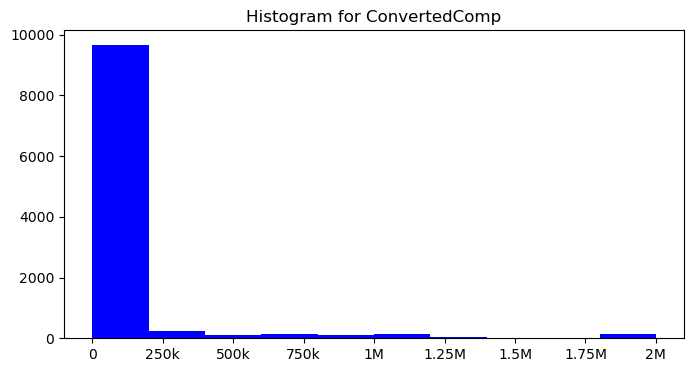

In [57]:
#Plot the histogram for the column ConvertedComp.
fig=plt.figure(figsize=(8,4))
plt.hist(Survey_data2['ConvertedComp'], bins=10, color='blue')
plt.title('Histogram for ConvertedComp')
plt.xticks([0, 250000, 500000, 750000, 1000000, 1250000, 1500000, 1750000, 2000000], ['0', '250k', '500k', '750k', '1M', '1.25M', '1.5M', '1.75M', '2M'])
plt.show()

In [60]:
#What is the median of the column ConvertedComp
Survey_data2['ConvertedComp'].median()

57745.0

In [62]:
#How many responders identified themselves only as a Man
Survey_data2['Respondent'][Survey_data2['Gender']=='Man'].count()

10480

In [63]:
#How many responders identified themselves only as a woman
Survey_data2['Respondent'][Survey_data2['Gender']=='Woman'].count()

731

<AxesSubplot:ylabel='Frequency'>

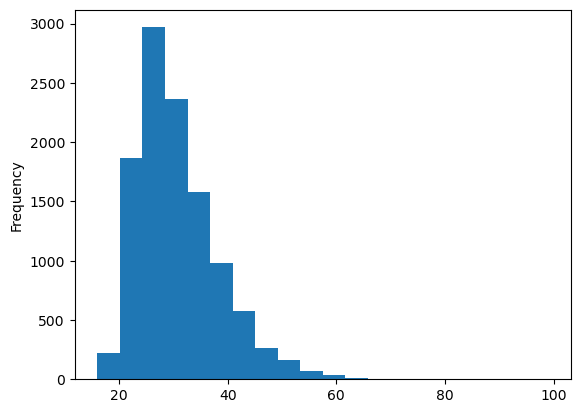

In [65]:
#Plot a histogram of the column Age
Survey_data2['Age'].plot(kind='hist', bins=20)

<AxesSubplot:>

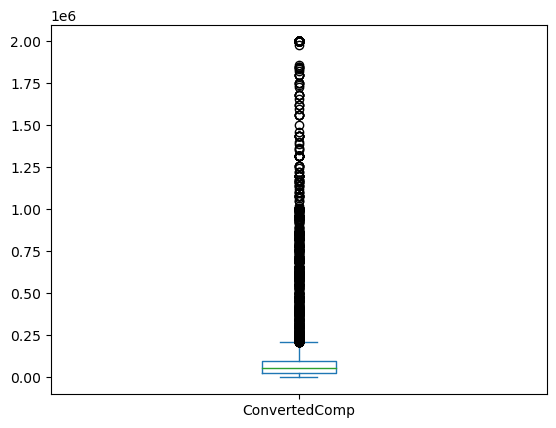

In [67]:
#Find out if outliers exist in the column ConvertedComp using a box plot
Survey_data['ConvertedComp'].plot(kind='box')

In [92]:
#Find out the Inter Quartile Range for the column ConvertedComp
ConvertedComp = Survey_data2['ConvertedComp'][Survey_data2['ConvertedComp'].notnull()]
ConvertedComp.astype('int')
Q3 = np.quantile(ConvertedComp, 0.75)
Q1 = np.quantile(ConvertedComp, 0.25)
IQR = Q3 - Q1
print('Inter Quartile Range:', IQR)

Inter Quartile Range: 73132.0


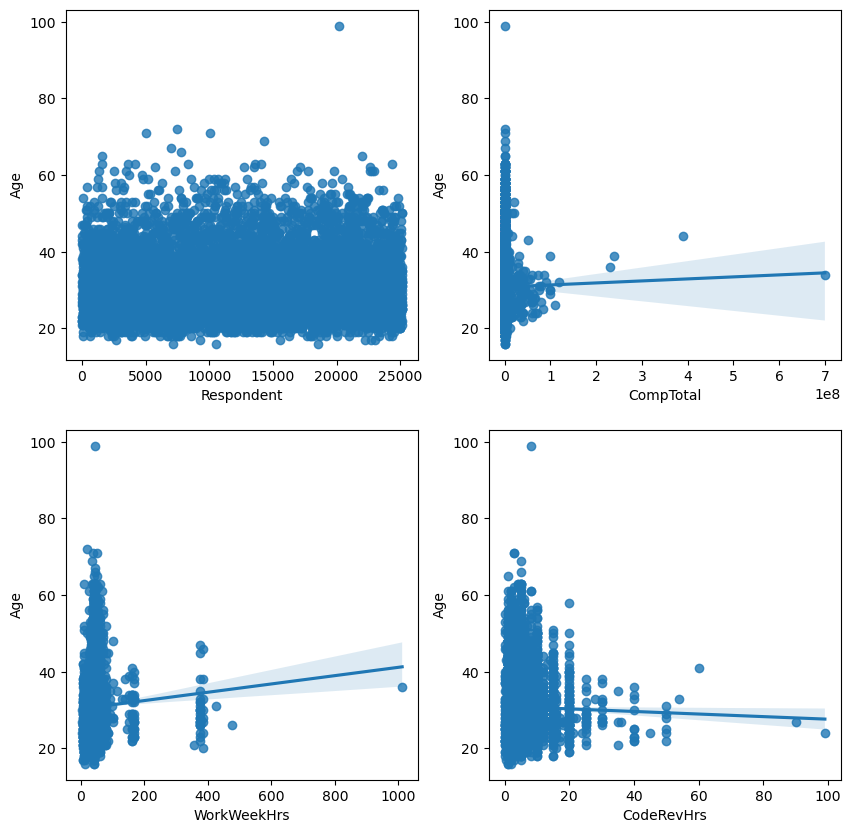

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.013490,0.002181,-0.015314,0.004621,0.004041
CompTotal,-0.013490,1.000000,0.001037,0.003510,0.007063,0.006970
ConvertedComp,0.002181,0.001037,1.000000,0.021143,-0.033865,0.105386
WorkWeekHrs,-0.015314,0.003510,0.021143,1.000000,0.026517,0.036518
CodeRevHrs,0.004621,0.007063,-0.033865,0.026517,1.000000,-0.020469
Age,0.004041,0.006970,0.105386,0.036518,-0.020469,1.000000


In [97]:
#Find the correlation between Age and all other numerical columns
#'Respondent', 'CompTotal','ConvertedComp','WorkWeekHrs','CodeRevHrs','Age' are the ummeric columns
fig = plt.figure(figsize=(10,10))
ax1= fig.add_subplot(2,2,1)
ax1=sn.regplot(x='Respondent',y='Age',data=Survey_data2)
ax2= fig.add_subplot(2,2,2)
ax2=sn.regplot(x='CompTotal',y='Age',data=Survey_data2)
ax1= fig.add_subplot(2,2,3)
ax1=sn.regplot(x='WorkWeekHrs',y='Age',data=Survey_data2)
ax1= fig.add_subplot(2,2,4)
ax1=sn.regplot(x='CodeRevHrs',y='Age',data=Survey_data2)

plt.show()
Survey_data2.corr()

From the correlation table above, Age has no significant correlation with CompTotal, ConcertedComp, WorkWeekHrs and CodeRevHrs.

To answer the questions given for this analysis we have to normalise some columns as they have multiple option thata re seperated by a delimeter ';'

In [31]:
#Normalise 'LanguageWorkedWith' column
df_survey = Survey_data2

df_survey['LanguageWorkedWith'].astype('str')

0                                      C;C++;C#;Python;SQL
1        Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;P...
2        Bash/Shell/PowerShell;HTML/CSS;JavaScript;PHP;...
3        Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;T...
4        Bash/Shell/PowerShell;HTML/CSS;JavaScript;Type...
                               ...                        
11547                   C#;F#;HTML/CSS;Java;JavaScript;SQL
11548                          HTML/CSS;JavaScript;PHP;SQL
11549    Assembly;Bash/Shell/PowerShell;C;C++;C#;Java;J...
11550    Bash/Shell/PowerShell;C++;C#;HTML/CSS;Java;Jav...
11551    Bash/Shell/PowerShell;C;C++;Go;HTML/CSS;PHP;Py...
Name: LanguageWorkedWith, Length: 11398, dtype: object

In [33]:
df_survey['LanguageWorkedWith'] = df_survey['LanguageWorkedWith'].str.split(';')
df_survey = df_survey.explode('LanguageWorkedWith', ignore_index=True)

/tmp/wsuser/ipykernel_168/3120930042.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_survey['LanguageWorkedWith'] = df_survey['LanguageWorkedWith'].str.split(';')


In [37]:
df_survey[['Respondent','LanguageWorkedWith']]

,Respondent,LanguageWorkedWith
0,4,C
1,4,C++
2,4,C#
3,4,Python
4,4,SQL
...,...,...
59798,25142,Go
59799,25142,HTML/CSS
59800,25142,PHP
59801,25142,Python


In [39]:
#Top 10 Programming Language
Top_language = df_survey.groupby(['LanguageWorkedWith'])['Respondent'].agg(['count']).sort_values(by='count',ascending=False)
Top_language.head(10)

,count
LanguageWorkedWith,
JavaScript,8687
HTML/CSS,7830
SQL,7106
Bash/Shell/PowerShell,4642
Python,4542
Java,4506
C#,4288
TypeScript,3232
PHP,2913


In [59]:
#Normalise 'DatabaseWorkedWith' column
df_database = Survey_data2 
df_database['DatabaseWorkedWith'].astype('str')
df_database['DatabaseWorkedWith'] = df_database['DatabaseWorkedWith'].str.split(';')
df_database = df_database.explode('DatabaseWorkedWith', ignore_index=True)

/tmp/wsuser/ipykernel_168/3656346219.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_database['DatabaseWorkedWith'] = df_database['DatabaseWorkedWith'].str.split(';')


,Respondent,LanguageWorkedWith
0,4,C;C++;C#;Python;SQL
1,4,C;C++;C#;Python;SQL
2,9,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;P...
3,9,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;P...
4,9,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;P...
...,...,...
31823,25137,HTML/CSS;JavaScript;PHP;SQL
31824,25138,Assembly;Bash/Shell/PowerShell;C;C++;C#;Java;J...
31825,25141,Bash/Shell/PowerShell;C++;C#;HTML/CSS;Java;Jav...
31826,25141,Bash/Shell/PowerShell;C++;C#;HTML/CSS;Java;Jav...


In [61]:
#Top database
Top_database = df_database.groupby(['DatabaseWorkedWith'])['Respondent'].agg(['count']).sort_values(by='count',ascending=False)
Top_database.head(10)

,count
DatabaseWorkedWith,
MySQL,5469
Microsoft SQL Server,4110
PostgreSQL,4097
SQLite,3248
MongoDB,3016
Redis,2508
Elasticsearch,1954
Oracle,1744
MariaDB,1709


In [62]:
df_platform = Survey_data2 
df_platform['PlatformWorkedWith'].astype('str')
df_platform['PlatformWorkedWith'] = df_platform['PlatformWorkedWith'].str.split(';')
df_platform = df_platform.explode('PlatformWorkedWith', ignore_index=True)

/tmp/wsuser/ipykernel_168/4013519580.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_platform['PlatformWorkedWith'] = df_platform['PlatformWorkedWith'].str.split(';')


In [64]:
#Top platforms
Top_platform = df_platform.groupby(['PlatformWorkedWith'])['Respondent'].agg(['count']).sort_values(by='count',ascending=False)
Top_platform.head(10)

,count
PlatformWorkedWith,
Linux,5811
Windows,5563
Docker,4378
AWS,3588
Slack,2786
MacOS,2718
Android,2693
Microsoft Azure,1711
Raspberry Pi,1614


In [65]:
df_webframe = Survey_data2 
df_webframe['WebFrameWorkedWith'].astype('str')
df_webframe['WebFrameWorkedWith'] = df_webframe['WebFrameWorkedWith'].str.split(';')
df_webframe = df_webframe.explode('WebFrameWorkedWith', ignore_index=True)

/tmp/wsuser/ipykernel_168/1375933651.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_webframe['WebFrameWorkedWith'] = df_webframe['WebFrameWorkedWith'].str.split(';')


In [66]:
#Top Webframes
Top_webframe = df_webframe.groupby(['WebFrameWorkedWith'])['Respondent'].agg(['count']).sort_values(by='count',ascending=False)
Top_webframe.head(10)

,count
WebFrameWorkedWith,
jQuery,4629
Angular/Angular.js,3327
React.js,3302
ASP.NET,3042
Express,2028
Spring,1728
Vue.js,1485
Flask,1186
Django,1176


In [73]:
#Emerging languages for next year
df_emglanguages = Survey_data2 
df_emglanguages['LanguageDesireNextYear'].astype('str')
df_emglanguages['LanguageDesireNextYear'] = df_emglanguages['LanguageDesireNextYear'].str.split(';')
df_emglanguages = df_emglanguages.explode('LanguageDesireNextYear', ignore_index=True)
Top_emerging_languages = df_emglanguages.groupby(['LanguageDesireNextYear'])['Respondent'].agg(['count']).sort_values(by='count',ascending=False)
Top_emerging_languages.head(10)

/tmp/wsuser/ipykernel_168/3600261855.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_emglanguages['LanguageDesireNextYear'] = df_emglanguages['LanguageDesireNextYear'].str.split(';')


,count
LanguageDesireNextYear,
JavaScript,6630
HTML/CSS,5328
Python,5239
SQL,5012
TypeScript,4088
C#,3591
Bash/Shell/PowerShell,3097
Java,2953
Go,2759


In [75]:
#Emerging databases for next year
df_emgdb = Survey_data2 
df_emgdb['DatabaseDesireNextYear'].astype('str')
df_emgdb['DatabaseDesireNextYear'] = df_emgdb['DatabaseDesireNextYear'].str.split(';')
df_emgdb = df_emgdb.explode('DatabaseDesireNextYear', ignore_index=True)
Top_emerging_database = df_emgdb.groupby(['DatabaseDesireNextYear'])['Respondent'].agg(['count']).sort_values(by='count',ascending=False)
Top_emerging_database.head(10)

/tmp/wsuser/ipykernel_168/3353859892.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_emgdb['DatabaseDesireNextYear'] = df_emgdb['DatabaseDesireNextYear'].str.split(';')


,count
DatabaseDesireNextYear,
PostgreSQL,4328
MongoDB,3649
Redis,3331
MySQL,3281
Elasticsearch,2856
Microsoft SQL Server,2706
SQLite,2437
Firebase,1650
MariaDB,1385


In [76]:
#Emerging Webframes for next year
df_emgwf = Survey_data2 
df_emgwf['WebFrameDesireNextYear'].astype('str')
df_emgwf['WebFrameDesireNextYear'] = df_emgwf['WebFrameDesireNextYear'].str.split(';')
df_emgwf = df_emgwf.explode('WebFrameDesireNextYear', ignore_index=True)
Top_emerging_webframe = df_emgwf.groupby(['WebFrameDesireNextYear'])['Respondent'].agg(['count']).sort_values(by='count',ascending=False)
Top_emerging_webframe.head(10)

/tmp/wsuser/ipykernel_168/2647093906.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_emgwf['WebFrameDesireNextYear'] = df_emgwf['WebFrameDesireNextYear'].str.split(';')


,count
WebFrameDesireNextYear,
React.js,4714
Vue.js,3143
Angular/Angular.js,3059
ASP.NET,2382
jQuery,2241
Express,1957
Spring,1564
Django,1504
Flask,1240


<h2>Conclusions</h2>

<ul>
    <li>The top 5 programming languages used this yeear are JavaScript, HTML/CSS, SQL, Bash/Shell/PowerShell and Python.</li>
    <li>Top 5 Databases this year are Mysql, Microsft SQL server, PosrgreSQL, SQL Lite and MongoD, while top 5 Webframes are jQuery, Angular/Angular.js, React.js, ASP.NET, Express.</li>
    <li>Top 5 emerging programming languages for next year are JavaScript, HTML/CSS,Python, SQL and TypeScript</li>
    <li>Top 5 emerging Databases for next year are PostgreSQL, MongoDB, Redis, MySQL and Elasticsearch. For top 5 emerging Webframes we have React.js, Vue.js, Angular/Angular.js, ASP.NET	2382
jQuery.</li>
</ul>